# Expresiones regulares

En este notebook veremos ejemplos de expresiones regulares con Python.
 
 Fuente: [Corey Schaffer's tutorial on regular expressions](https://www.youtube.com/watch?v=sa-TUpSx1JA)

## Comparación de Python y R

|Python   |R     | Acción |
|---|---|---|
|`re.search()`|`str_extract()`| Busca un patrón en la cadena de texto y para cuando lo encuentra. Retorna un objeto que contiene información sobre la coincidencia. |
|`re.findall()`|`str_extract_all()`| Busca todas las ocurrencias de un patrón en una cadena de texto y las retorna como una lista de strings. |
|`re.finditer()`|`str_match_all()`| Retorna un iterador de objetos que contienen información sobre todas las coincidencias de un patrón en una cadena de texto. |
|`re.sub()`|`str_replace_all()`| Reemplaza todas las ocurrencias de un patrón en una cadena de texto por otro string. |
|`re.split()`|`str_split()`| Separa una cadena de texto en varias subcadenas usando un patrón como separador. Retorna una lista de strings. |
|`re.subn()`|?| Similar a `re.sub()`, pero retorna el string resultante y el número de reemplazos realizados. |
|`re.match()`|?| Busca un patrón en el inicio de una cadena de texto. Si el patrón se encuentra, retorna un objeto que contiene información sobre la coincidencia. |
|`re.fullmatch()`|?| Busca un patrón que coincida con toda la cadena de texto. Si el patrón se encuentra, retorna un objeto que contiene información sobre la coincidencia. |
|`re.compile()`|?| Compila una expresión regular en un objeto que se puede reutilizar en varias búsquedas. |
|?|`str_detect()`| Retorna un vector booleano que indica si una cadena de texto contiene al menos una ocurrencia de un patrón. |
|?|`str_subset()`| Retorna un vector de strings que contienen al menos una ocurrencia de un patrón en una lista de strings. |

La tabla anterior muestra las similitudes y diferencias en términos de las funciones de expresiones regulares en Python y R. 

Como podéis ver, son más o menos similares. 

## Ejercicios con regex

In [1]:
import re

text_to_search = '''
abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890
Ha HaHa
MetaCharacters (Need to be escaped):
. ^ $ * + ? { } [ ] \ | ( )
coreyms.com
321-555-4321
123.555.1234
123*555*1234
800-555-1234
900-555-1234
Mr. Schafer
Mr Smith
Ms Davis
Mrs. Robinson
Mr. T
'''

In [20]:
pattern = '[0-9]{3}\D'

In [21]:
# realiza una búsqueda
matches= re.search(pattern, text_to_search)
if matches:
    print(matches.group())

890



### Encontrar todas las ocurrencias

- `re.findall()`: busca todas las ocurrencias de un patrón, no sólo la primera, como hace search().
- `re.finditer()`: si queremos más información sobre todas las coincidencias de un patrón que el texto coincidente, finditer() proporciona objetos coincidentes en lugar de cadenas, los cuales nos permiten extraer más información.

In [27]:
# obtiene todas las ocurrencias
matches = re.findall(pattern, text_to_search)
if matches:
    for m in matches:
        print(m.strip())
        

890
321-
555-
321
123.
555.
234
123*
555*
234
800-
555-
234
900-
555-
234


In [26]:
## obtiene todas las ocurrencias y las posiciones de inicio-fin
matches = re.finditer(pattern, text_to_search)
if matches:
    for m in matches:
        print("%02d-%02d: %s" % (m.start(), m.end(), m.group()))

62-66: 890

151-155: 321-
155-159: 555-
160-164: 321

164-168: 123.
168-172: 555.
173-177: 234

177-181: 123*
181-185: 555*
186-190: 234

190-194: 800-
194-198: 555-
199-203: 234

203-207: 900-
207-211: 555-
212-216: 234



### `re.match()`

Busca un patrón en una cadena de texto. Por sí sola no nos devuelve nada, necesitamos las funciones `group()` o `groups()`:

- `group()`: devuelve la coincidencia
- `groups()`: devuelve todos los grupos detectados

In [28]:
m = re.match("a(.)(.)","abcedf")
print(m)

<re.Match object; span=(0, 3), match='abc'>


In [29]:
print(m.group(0)) # devuelve la ocurrencia entera

abc


In [30]:
print(m.group()) # devuelve la ocurrencia entera, igual que arriba

abc


In [31]:
print(m.groups()) # devuelve cada grupo encontrado (recordad que los grupos los definen los paréntesis)

('b', 'c')


In [32]:
print(m.group(1)) # devuelve la ocurrencia encontrada en el primer grupo

b


### Diferencias entre `re.match()` y `re.search()`

Python ofrece dos operaciones diferentes basadas en expresiones regulares: 

- `re.match()` busca una coincidencia sólo al principio de la cadena
- `re.search()` busca una coincidencia en cualquier parte de la cadena (esto es lo que hace Perl por defecto).

In [ ]:
print(re.match("c", "abcdef"))    # No hay match
print(re.search("^c", "abcdef"))  # No hay match

In [34]:
print(re.search("c", "abcdef"))   # Sí hay match

<re.Match object; span=(2, 3), match='c'>


**Nota**

- `re.match` siempre busca coincidencias al principio de la cadena de entrada incluso si está en modo MULTILINE.

- Sin embargo, `re.search`, cuando está en modo MULTILINE, es capaz de buscar al principio de cada línea si se usa en combinación con `^`.

In [35]:
# \n equivale a un salto de línea
print(re.match('X', 'A\nB\nX', re.MULTILINE))  # No hay match
print(re.search('^X', 'A\nB\nX', re.MULTILINE))  # Hay match
print(re.search('^X', 'A\nB\nX')) # No hay match

None
<re.Match object; span=(4, 5), match='X'>
None


### `re.split()`

Permite dividir el texto de acuerdo a una expresión regular.

In [ ]:
text = """Ross McFluff: 834.345.1254 155 Elm Street

Ronald Heathmore: 892.345.3428 436 Finley Avenue
Frank Burger: 925.541.7625 662 South Dogwood Way


Heather Albrecht: 548.326.4584 919 Park Place"""

In [ ]:
# Divide en elementos cada vez que encuentra un salto de línea
re.split(r'\n',text)

In [ ]:
# Vamos a hacer lo mismo, pero permitiendo que haya 1 o más saltos de línea
re.split(r'\n+', text)

¿Qué diferencias encuentras? ¿Por qué?

In [ ]:
# Respuesta

### `re.sub()`

Permite sustituir las coincidencias encontradas por expresiones regulares.

In [ ]:
text = '''Peter Piper picked a peck of pickled peppers
A peck of pickled peppers Peter Piper picked
If Peter Piper picked a peck of pickled peppers
Where’s the peck of pickled peppers Peter Piper picked?'''

In [ ]:
print(re.sub(r'[aeiou]','_', text))

Podemos incluso acceder a la ocurrencia encontrada y utilizarla en la sustitución. En el siguiente ejemplo usaremos la vocal para envolverla en corchetes:

In [ ]:
print(re.sub(r'([aeiou])',r'[\1]', text))

Y yendo aún más allá, modificar el formato como queramos. Por ejemplo, a continuación tenemos fechas en formato americano y vamos a 

In [ ]:
American_dates = ["7/31/1976", "02.15.1970", "11-31-1986", "04/01.2020"]

In [ ]:
print(American_dates)
print([re.sub(r'(\d+)(\D)(\d+)(\D)(\d+)', r'\3\2\1\4\5', date) for date in American_dates])

Podemos entender mejor lo que ha ocurrido si usamos una herramienta de prueba en vivo. Por ejemplo: https://regex101.com/.

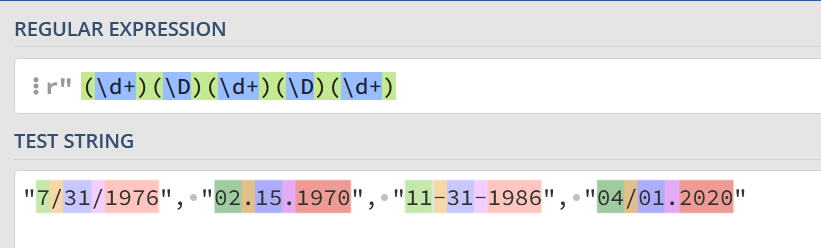

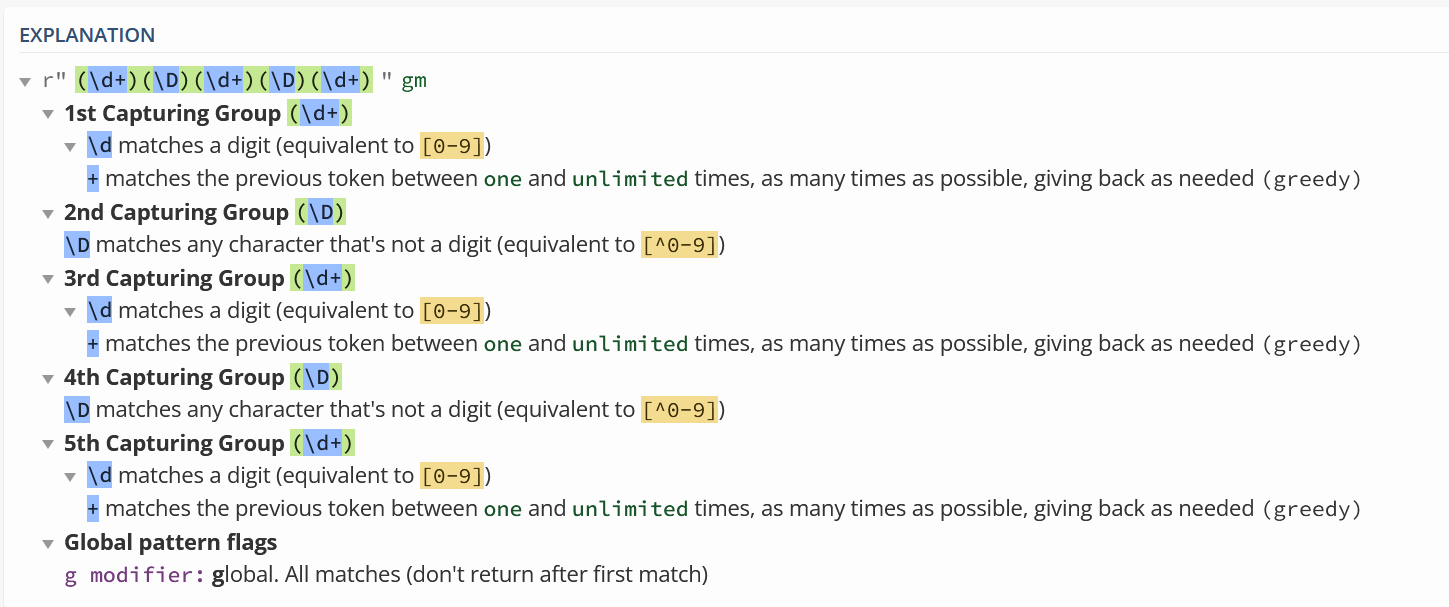

Cada paréntesis encierra un grupo, que van desde el 1 al 5. Por tanto, lo que está haciendo la expresión en python:

`re.sub(r'(\d+)(\D)(\d+)(\D)(\d+)', r'\3\2\1\4\5', date)`

Es intercambiar el orden del primer grupo y el del tercero.
De esta forma, pasamos de mm/dd/aaaa a dd/mm/aaaa.

### Ejemplo más complejo: validación de email

In [ ]:
valid = re.compile(r"^[a-z]+@[a-z]+\.[a-z]{3}$")
print(valid.match('alvin@ntnu.edu'))
print(valid.match('alvin123@ntnu.edu'))
print(valid.match('alvin@ntnu.homeschool'))


¿Por qué no son válidos el segundo y el tercer email? ¿Cómo podrías hacer que el segundo email sí fuera válido?

## Referencias

- [Python regular expression cheatsheet](https://learnbyexample.github.io/python-regex-cheatsheet/)
- [Python official regular expression documentation](https://docs.python.org/3/library/re.html)
- [Friedl, Jeffrey. Mastering Regular Expressions. 3rd ed., O’Reilly Media, 2009.](https://doc.lagout.org/programmation/Regular%20Expressions/Mastering%20Regular%20Expressions_%20Understand%20Your%20Data%20and%20Be%20More%20Productive%20%283rd%20ed.%29%20%5BFriedl%202006-08-18%5D.pdf)